# Heart Disease Prediction
# EEE485 Project
## Ata Yavuzyılmaz - Atakan Topcu

In [1]:
import numpy as np 
import pandas as pd #for Importing Data
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
from ttictoc import tic,toc
from random import randrange
import random
from math import sqrt
from math import e

dt = pd.read_csv('heart.csv') #Edit accordingly
dt.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_blood_pressure', 'Cholesterol', 'Fasting_blood_sugar', 'Rest_ecg', 'Max_heart_rate_achieved',
       'Exercise_induced_angina', 'St_depression', 'St_slope', 'Num_major_vessels', 'Thalassemia', 'Target']
dt.head() #For checking



Age  Sex  Chest_pain_type  Resting_blood_pressure  Cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   Fasting_blood_sugar  Rest_ecg  Max_heart_rate_achieved  \
0                    1         0                      150   
1                    0         1                      187   
2                    0         0                      172   
3                    0         1                      178   
4                    0         1                      163   

   Exercise_induced_angina  St_depression  St_slope  Num_major_vessels  \
0                        0            2.3         0                  0   
1                        0            3.5         0                  0   
2                        0            1.4         2                  0   
3                        0            0.8         2                  0   
4                        1            0.6         2                  0   

   Thalassemia  Target  
0            1       1  
1            2       1  
2            2       1  
3            2       1  
4            2       1

As we can see some attributes must be of categorical value. However they are represented as integers.
We will create dummy variables for categorical variables later. 

In [2]:
dt.dtypes

Age                          int64
Sex                          int64
Chest_pain_type              int64
Resting_blood_pressure       int64
Cholesterol                  int64
Fasting_blood_sugar          int64
Rest_ecg                     int64
Max_heart_rate_achieved      int64
Exercise_induced_angina      int64
St_depression              float64
St_slope                     int64
Num_major_vessels            int64
Thalassemia                  int64
Target                       int64
dtype: object

Checking Properties of the Data

In [3]:
dt.describe()

Age         Sex  Chest_pain_type  Resting_blood_pressure  \
count  303.000000  303.000000       303.000000              303.000000   
mean    54.366337    0.683168         0.966997              131.623762   
std      9.082101    0.466011         1.032052               17.538143   
min     29.000000    0.000000         0.000000               94.000000   
25%     47.500000    0.000000         0.000000              120.000000   
50%     55.000000    1.000000         1.000000              130.000000   
75%     61.000000    1.000000         2.000000              140.000000   
max     77.000000    1.000000         3.000000              200.000000   

       Cholesterol  Fasting_blood_sugar    Rest_ecg  Max_heart_rate_achieved  \
count   303.000000           303.000000  303.000000               303.000000   
mean    246.264026             0.148515    0.528053               149.646865   
std      51.830751             0.356198    0.525860                22.905161   
min     126.000000             0.000000    0.000000                71.000000   
25%     211.000000             0.000000    0.000000               133.500000   
50%     240.000000             0.000000    1.000000               153.000000   
75%     274.500000             0.000000    1.000000               166.000000   
max     564.000000             1.000000    2.000000               202.000000   

       Exercise_induced_angina  St_depression    St_slope  Num_major_vessels  \
count               303.000000     303.000000  303.000000         303.000000   
mean                  0.326733       1.039604    1.399340           0.729373   
std                   0.469794       1.161075    0.616226           1.022606   
min                   0.000000       0.000000    0.000000           0.000000   
25%                   0.000000       0.000000    1.000000           0.000000   
50%                   0.000000       0.800000    1.000000           0.000000   
75%                   1.000000       1.600000    2.000000           1.000000   
max                   1.000000       6.200000    2.000000           4.000000   

       Thalassemia      Target  
count   303.000000  303.000000  
mean      2.313531    0.544554  
std       0.612277    0.498835  
min       0.000000    0.000000  
25%       2.000000    0.000000  
50%       2.000000    1.000000  
75%       3.000000    1.000000  
max       3.000000    1.000000

Let's see the number of patients who has heart disease and patients who doesn't have heart disease

In [4]:
dt.Target.value_counts()

1    165
0    138
Name: Target, dtype: int64

Histograms for each variable

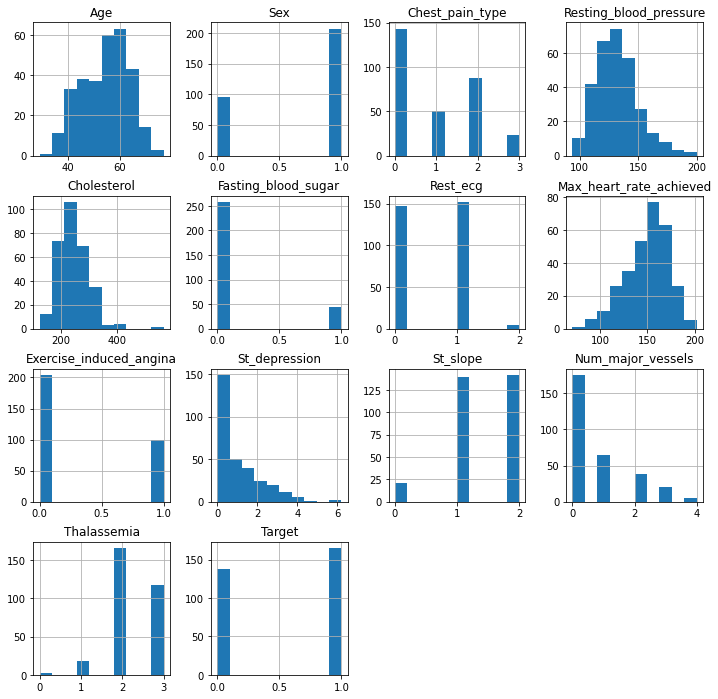

In [5]:
dt.hist(figsize = (12, 12))
plt.show()

Produce Correlation Matrix to see how each attribution affects each other

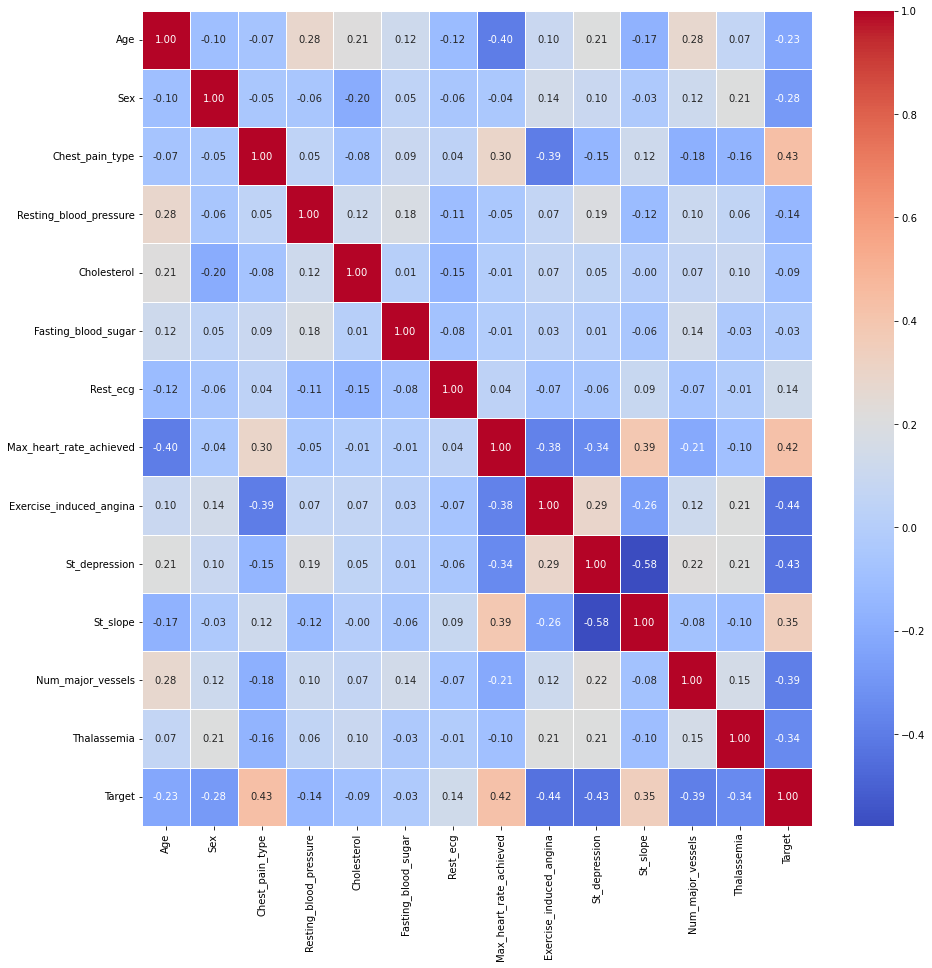

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(dt.corr(),annot=True, linewidths=0.5, fmt='.2f', cmap="coolwarm")
plt.show()
#It can be seen that attributes are not linearly dependent of each other. 

Now we need to create dummy variables for categorical variables.
We need to first decide on which attributes are the categorical variables

In [7]:
categorical_val = []
noncategorical_val = []
for column in dt.columns:
    if len(dt[column].unique()) <= 5:  #Educated Guess :D
        categorical_val.append(column)
    else:
        noncategorical_val.append(column)
        
print("Categorical Values:")        
print(categorical_val)
print(f" Total Number : {len(categorical_val)}")
print('<============================================================================================>')
print("Non-Categorical Values:")        
print(noncategorical_val)
print(f" Total Number : {len(noncategorical_val)}")

Categorical Values:
['Sex', 'Chest_pain_type', 'Fasting_blood_sugar', 'Rest_ecg', 'Exercise_induced_angina', 'St_slope', 'Num_major_vessels', 'Thalassemia', 'Target']
 Total Number : 9
<============================================================================================>
Non-Categorical Values:
['Age', 'Resting_blood_pressure', 'Cholesterol', 'Max_heart_rate_achieved', 'St_depression']
 Total Number : 5


So, there are 9 categorical variables and 5 continuous variables. While continuous variables is already quantified, 
we have to quantify categorical variables as well. This is done by dummy coding.
But firstly, lets see how continuous variables are related to target.

In [8]:
import plotly.express as px #For 3d data plot
fig = px.scatter_3d(dt, x='Cholesterol', y='Max_heart_rate_achieved', z='Age', size='St_depression',
              color='Target',opacity=1)
fig.show()
#Couldn't fit in Resting Blood Pressure



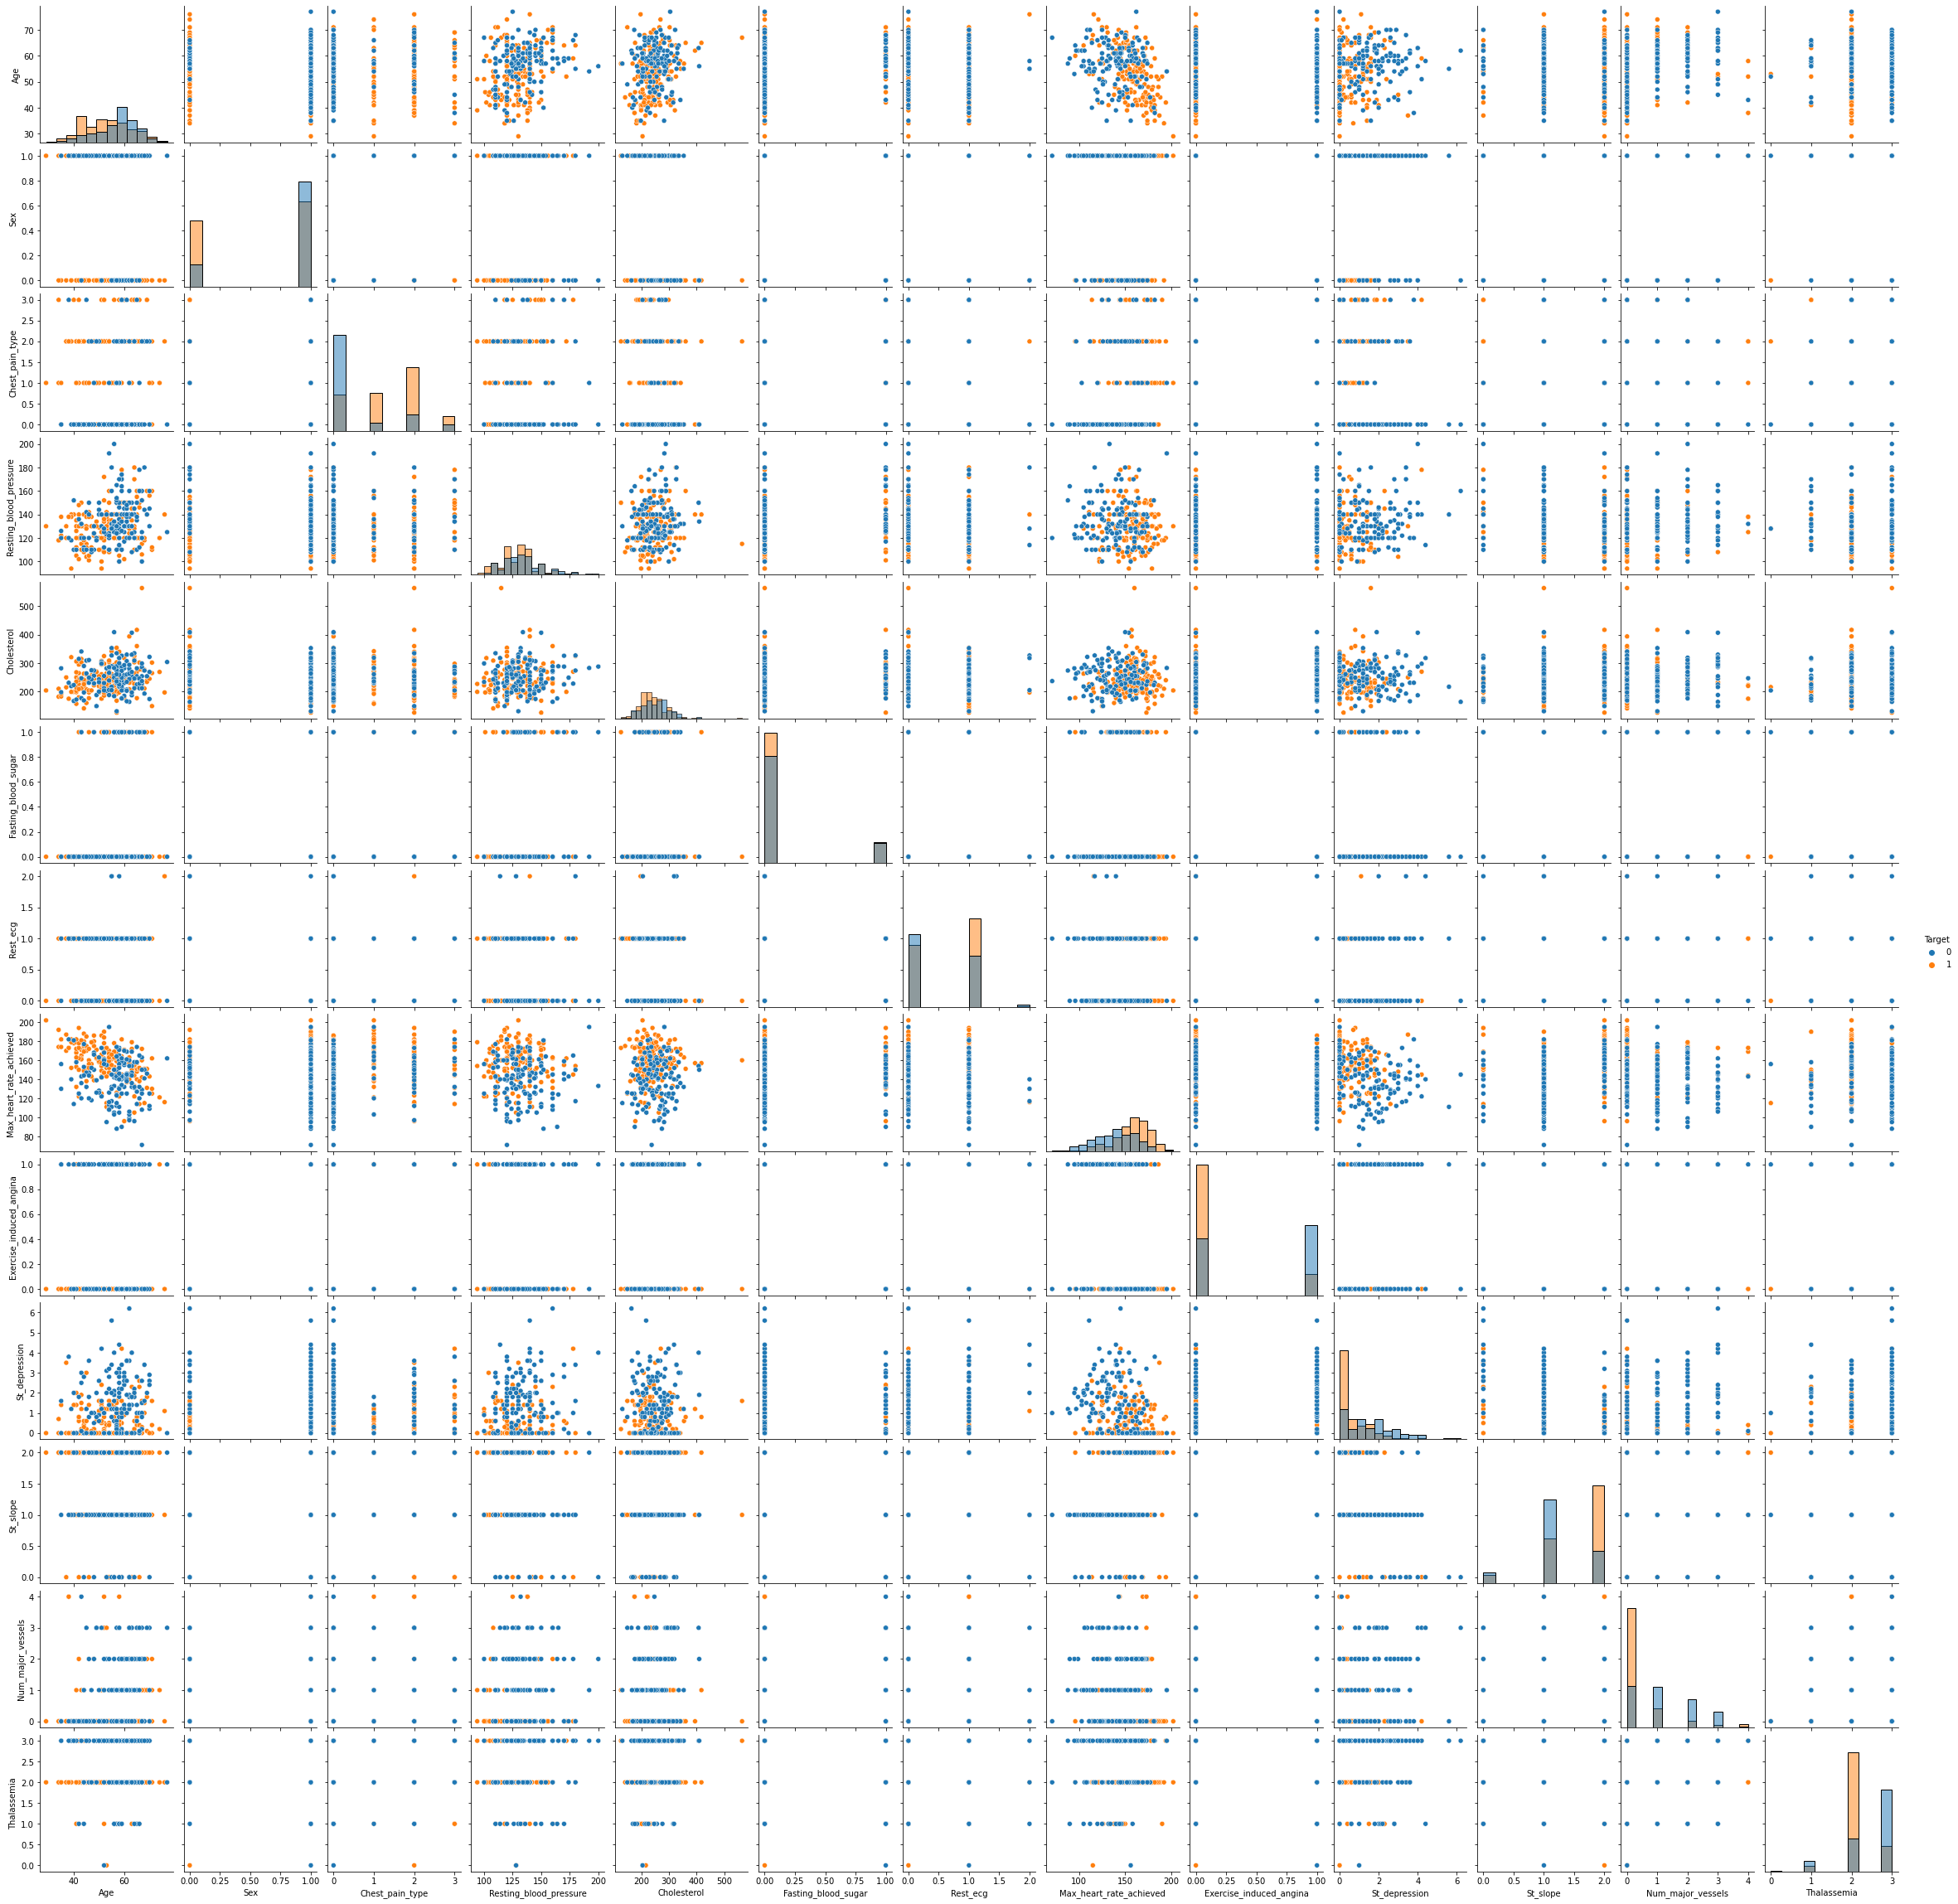

In [9]:
sns.pairplot(dt,hue='Target',diag_kind="hist")
#With this plot, we can see the correlations better!

In [10]:
categorical_val.remove('Target')
print(categorical_val)

['Sex', 'Chest_pain_type', 'Fasting_blood_sugar', 'Rest_ecg', 'Exercise_induced_angina', 'St_slope', 'Num_major_vessels', 'Thalassemia']


Using Panda's get_dummies command to convert categorical values to dummy variables.

In [11]:
dataset = pd.get_dummies(dt, columns = categorical_val)
dataset.describe()

Age  Resting_blood_pressure  Cholesterol  \
count  303.000000              303.000000   303.000000   
mean    54.366337              131.623762   246.264026   
std      9.082101               17.538143    51.830751   
min     29.000000               94.000000   126.000000   
25%     47.500000              120.000000   211.000000   
50%     55.000000              130.000000   240.000000   
75%     61.000000              140.000000   274.500000   
max     77.000000              200.000000   564.000000   

       Max_heart_rate_achieved  St_depression      Target       Sex_0  \
count               303.000000     303.000000  303.000000  303.000000   
mean                149.646865       1.039604    0.544554    0.316832   
std                  22.905161       1.161075    0.498835    0.466011   
min                  71.000000       0.000000    0.000000    0.000000   
25%                 133.500000       0.000000    0.000000    0.000000   
50%                 153.000000       0.800000    1.000000    0.000000   
75%                 166.000000       1.600000    1.000000    1.000000   
max                 202.000000       6.200000    1.000000    1.000000   

            Sex_1  Chest_pain_type_0  Chest_pain_type_1  ...  St_slope_2  \
count  303.000000         303.000000         303.000000  ...  303.000000   
mean     0.683168           0.471947           0.165017  ...    0.468647   
std      0.466011           0.500038           0.371809  ...    0.499842   
min      0.000000           0.000000           0.000000  ...    0.000000   
25%      0.000000           0.000000           0.000000  ...    0.000000   
50%      1.000000           0.000000           0.000000  ...    0.000000   
75%      1.000000           1.000000           0.000000  ...    1.000000   
max      1.000000           1.000000           1.000000  ...    1.000000   

       Num_major_vessels_0  Num_major_vessels_1  Num_major_vessels_2  \
count           303.000000           303.000000           303.000000   
mean              0.577558             0.214521             0.125413   
std               0.494765             0.411169             0.331734   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               1.000000             0.000000             0.000000   
75%               1.000000             0.000000             0.000000   
max               1.000000             1.000000             1.000000   

       Num_major_vessels_3  Num_major_vessels_4  Thalassemia_0  Thalassemia_1  \
count           303.000000           303.000000     303.000000     303.000000   
mean              0.066007             0.016502       0.006601       0.059406   
std               0.248704             0.127605       0.081110       0.236774   
min               0.000000             0.000000       0.000000       0.000000   
25%               0.000000             0.000000       0.000000       0.000000   
50%               0.000000             0.000000       0.000000       0.000000   
75%               0.000000             0.000000       0.000000       0.000000   
max               1.000000             1.000000       1.000000       1.000000   

       Thalassemia_2  Thalassemia_3  
count     303.000000     303.000000  
mean        0.547855       0.386139  
std         0.498528       0.487668  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         1.000000       0.000000  
75%         1.000000       1.000000  
max         1.000000       1.000000  

[8 rows x 31 columns]

In [12]:
dataset.rename(columns={'Sex_0':'Female'}, inplace=True)
dataset.rename(columns={'Sex_1':'Male'}, inplace=True)
dataset.head()

Age  Resting_blood_pressure  Cholesterol  Max_heart_rate_achieved  \
0   63                     145          233                      150   
1   37                     130          250                      187   
2   41                     130          204                      172   
3   56                     120          236                      178   
4   57                     120          354                      163   

   St_depression  Target  Female  Male  Chest_pain_type_0  Chest_pain_type_1  \
0            2.3       1       0     1                  0                  0   
1            3.5       1       0     1                  0                  0   
2            1.4       1       1     0                  0                  1   
3            0.8       1       0     1                  0                  1   
4            0.6       1       1     0                  1                  0   

   ...  St_slope_2  Num_major_vessels_0  Num_major_vessels_1  \
0  ...           0                    1                    0   
1  ...           0                    1                    0   
2  ...           1                    1                    0   
3  ...           1                    1                    0   
4  ...           1                    1                    0   

   Num_major_vessels_2  Num_major_vessels_3  Num_major_vessels_4  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Thalassemia_0  Thalassemia_1  Thalassemia_2  Thalassemia_3  
0              0              1              0              0  
1              0              0              1              0  
2              0              0              1              0  
3              0              0              1              0  
4              0              0              1              0  

[5 rows x 31 columns]

Feature Scaling for better optimization

Standardization

We only need to standardize continuous features!

In [13]:
mean = dataset[['Age','Resting_blood_pressure','Cholesterol','Max_heart_rate_achieved','St_depression']].mean(axis=0)
dataset[['Age','Resting_blood_pressure','Cholesterol','Max_heart_rate_achieved','St_depression']] -= mean
std = dataset[['Age','Resting_blood_pressure','Cholesterol','Max_heart_rate_achieved','St_depression']].std(axis=0)
dataset[['Age','Resting_blood_pressure','Cholesterol','Max_heart_rate_achieved','St_depression']] /= std

dataset.head()

Age  Resting_blood_pressure  Cholesterol  Max_heart_rate_achieved  \
0  0.950624                0.762694    -0.255910                 0.015417   
1 -1.912150               -0.092585     0.072080                 1.630774   
2 -1.471723               -0.092585    -0.815424                 0.975900   
3  0.179877               -0.662770    -0.198030                 1.237849   
4  0.289984               -0.662770     2.078611                 0.582975   

   St_depression  Target  Female  Male  Chest_pain_type_0  Chest_pain_type_1  \
0       1.085542       1       0     1                  0                  0   
1       2.119067       1       0     1                  0                  0   
2       0.310399       1       1     0                  0                  1   
3      -0.206364       1       0     1                  0                  1   
4      -0.378618       1       1     0                  1                  0   

   ...  St_slope_2  Num_major_vessels_0  Num_major_vessels_1  \
0  ...           0                    1                    0   
1  ...           0                    1                    0   
2  ...           1                    1                    0   
3  ...           1                    1                    0   
4  ...           1                    1                    0   

   Num_major_vessels_2  Num_major_vessels_3  Num_major_vessels_4  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Thalassemia_0  Thalassemia_1  Thalassemia_2  Thalassemia_3  
0              0              1              0              0  
1              0              0              1              0  
2              0              0              1              0  
3              0              0              1              0  
4              0              0              1              0  

[5 rows x 31 columns]

## Functions for evaluation

In [14]:
def cross_validation(dataset, n_folds):  #Divide the dataset
    X = dataset.drop('Target', axis=1)
    y = dataset.Target
    dataset_splitX = []
    dataset_splitY = []
    X_copy = X.values.tolist()
    Y_copy = y.values.tolist()
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        foldX = list()
        foldY = list()
        while len(foldX) < fold_size:
            index = randrange(len(X_copy))
            foldX.append(X_copy.pop(index))
            foldY.append(Y_copy.pop(index))
        dataset_splitX.append(foldX)
        dataset_splitY.append(foldY)
    return dataset_splitX,dataset_splitY


def Accuracy(Y_real,Y_predicted): #Accuracy test
    correct = 0
    for i in range(len(Y_real)):
        if Y_real[i] == Y_predicted[i]:
            correct += 1
    return correct / float(len(Y_real)) * 100.0

## k Nearest Neighbors

In [15]:
def Distance_Norm(Vector1, Vector2): #Creating a function to find the norm of difference between two vectors.
    V1=np.array(Vector1)
    V2=np.array(Vector2)
    V=sum((V1-V2)**2)
    Distance=sqrt(V)
    return Distance


def get_Neigh(X_train,Y_train,X_single,num_Neigbour): #Function for getting the closest vectors for a single point and making a list like that
    distances=[]
    for k in range(len(X_train)):
        getDistance=Distance_Norm(X_train[k], X_single)
        distances.append((X_train[k],Y_train[k],getDistance))
    distances=sorted(distances,key=lambda x: x[2])#Sorting the List according to the shortest distance
    neighboursX=[]
    neighboursY=[]
    for i in range(num_Neigbour):
        neighboursX.append(distances[i][0])    
        neighboursY.append(distances[i][1])    
    return neighboursX,neighboursY

def predict_Y(X_train,Y_train, X_single, num_Neigbour):
    neighborsX,neighboursY = get_Neigh(X_train, Y_train, X_single, num_Neigbour)
    counts=[]
    for i in neighboursY:
        counts.append(i)
    ones=counts.count(1)
    zeros=counts.count(0)
    if ones >= zeros:
        return 1
    else:
        return 0
    
def kNN(X_train,Y_train,X_test,num_Neigbour):  #kNN algorithm with the help of other defined functions
    Y_predictions=[]
    for row in X_test:
        predictedY=predict_Y(X_train,Y_train, row, num_Neigbour)
        Y_predictions.append(predictedY)
    return Y_predictions

## Support Vector Machine

In [16]:
def gradient_function(W, X, Y, C):
    summ = 0
    for i in range(0, len(X)):
        if (1 - (Y[i] * np.dot(W, X[i]))) > 0:
            summ += (C * Y[i] * X[i])
    
    #  result of gradient of the objective function
    return W - summ


# stochastic gradient descent
def gradient_descent(maxR, gamma, X, Y, C, tol):
    # give weights
    W = np.zeros(len(X[0]))
    for k in range(0, maxR):
        # shuffle the list
        shuffle_list = list(zip(X,Y))
        random.shuffle(shuffle_list)
        X, Y = zip(*shuffle_list)

        grad = gradient_function(W, X, Y, C)
        diff = -grad * gamma
        
        if np.all(np.abs(diff) <= tol):
            return W
       
        else:
            W = W + diff        
    return W

def svm_predict(X,W):
    results = []
    for col in X:
        ans = np.dot(W,col)
        if ans >=0:
            results.append(1)
        else:
            results.append(-1)
    return results


# Number of max repetitions for gradient descent
maxR = 200
# Learning rate of the gradient descent
gamma = 0.0001
# Tolerance to check if the gradient converges
tol = 1e-06


def SVM(X_train, Y_train, X_test, C, maxR, gamma, tol):
    for yi in range(len(Y_train)):
        if Y_train[yi] == 0:
            Y_train[yi] = -1
    X_test = np.array(X_test)
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    # Add 1 to every row for bias term
    X_train = np.insert(X_train,0,1,axis = 1)
    X_test = np.insert(X_test,0,1,axis = 1)
    # get the weights of SVM
    W = gradient_descent(maxR, gamma, X_train, Y_train, C, tol)
    # for train accuracy
    train_res = svm_predict(X_train, W)
    # predict the test values
    result = svm_predict(X_test, W)
    return train_res, result

## Shallow Neural Network

In [17]:
#Initialize Network
def initialization_of_network(n_inputs, n_hidden, n_outputs):
    total_network=[]
    hidden_layers=[{"Weights": [random.random() for i in range(n_inputs + 1)]} for i in range(n_hidden)] #Extra Weight for bias
    output_layers = [{'Weights':[random.random() for i in range(n_hidden + 1)]} for i in range(n_outputs)] #Extra Weight for bias
    #So, first component is the weights of the hidden layer
    total_network.append(hidden_layers)
    #So, second component is the weights of the output layer
    total_network.append(output_layers)
    return total_network


#Forward Propagation
def neuron_activation(inputs,neuron_weights):
    activation=neuron_weights[-1]
    for i in range(len(inputs)):
        activation += inputs[i]*neuron_weights[i]
        transfer=1/(1 + e**(-activation))
    return transfer  #This is for each neuron

#Activation function is the sigmoid function!
#output = 1 / (1 + e^(-activation))

'''
def transfer_func(activation_output):
    transfer=1/(1 + e**(-activation_output))
    return transfer
'''
def forward_propagation(network, inputs):
    inputs=inputs
    for layer in network:
        new_input=[]
        for neuron in layer: 
            weights=neuron["Weights"]
            '''
            activation=neuron_activation(inputs,weights)
            neuron["Outputs"]=transfer_func(activation)
            '''
            neuron["Outputs"]=neuron_activation(inputs,weights)
            new_input.append(neuron["Outputs"])
            inputs=new_input
    return inputs #Gives the final output

#Back Propagate Error
def transfer_derivative(output):
    return output * (1.0 - output) #Derivative of sigmoid

def backward_propagation_error(network, expected_output):
    #We will go backwards
    for index in reversed(range(len(network))):
        layer=network[index]
        errors=[]
        if index == len(network)-1:
            for neuron in layer:
                errors.append(expected_output-neuron["Outputs"])
        else:
            for j in range(len(layer)):
                error=0.0
                for neuron in network[index+1]:
                    error += (neuron["Weights"][j]*neuron["Delta"])
                errors.append(error)
        for k in range(len(layer)):
            neuron=layer[k]
            neuron['Delta'] = errors[k] * transfer_derivative(neuron['Outputs'])
            
#Train Network
#We have to update the weights, we do that by weight = weight + learning_rate (new variable) * error(stored in delta) * input
def update_weights(network, input_row , l_rate):
    for index in range(len(network)):
        inputs=input_row
        if not index == 0:
            inputs = [neuron['Outputs'] for neuron in network[index - 1]]
        for neuron in network[index]:
            for k in range(len(inputs)):
                neuron["Weights"][k]=(1-0.003*l_rate)*neuron["Weights"][k]+(l_rate*neuron["Delta"]*inputs[k])
            neuron['Weights'][-1] = (1-0.003*l_rate)*neuron['Weights'][-1]+l_rate * neuron['Delta'] #For bias
        
#       
def Network_Train(network,train_input,l_rate,n_epoch,train_output):
    for epoch in range(n_epoch):
        total_error=0
        for index in range(len(train_input)):
            input_row=train_input[index]
            expected_output=train_output[index]
            output=forward_propagation(network, input_row)
            total_error += (expected_output-output[0])**2
            backward_propagation_error(network, expected_output)
            update_weights(network, input_row, l_rate)
        # error=sqrt(total_error)
        # print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, error))


def Prediction(network,input_row):
    output=forward_propagation(network, input_row)
    if output[0] >0.5:
        return 1.0
    else:
        return 0.0

#Stochastic Gradient Descent
def back_propagation(trainX, trainY, testX, l_rate, n_epoch, n_hidden):
    n_inputs = len(trainX[0]) 
    n_outputs = 1 
    network = initialization_of_network(n_inputs, n_hidden, n_outputs)
    Network_Train(network, trainX, l_rate, n_epoch, trainY)
    train_predictions = []
    for row in trainX:
        prediction = Prediction(network, row)
        train_predictions.append(prediction)
    test_predictions = []
    for row in testX:
        prediction = Prediction(network, row)
        test_predictions.append(prediction)
    return train_predictions, test_predictions

## Parameter Tuning

In [36]:
# split test set from dataset
np.random.seed(1)
dd = dataset.copy()
train_df = dd.sample(frac = 0.7) 
test_df = dd.drop(train_df.index)
x_val, y_val = cross_validation(train_df.copy(), 6)

The optimal value of n_hidden is: 8


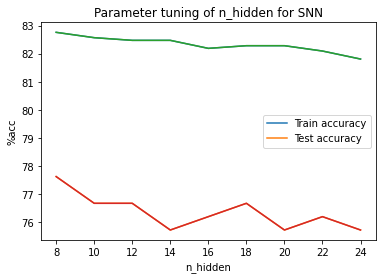

In [37]:
train_acc_list1 = []
test_acc_list1 = []
N = np.arange(8,25,2)
for n in N:
    train_acc1 = 0
    test_acc1 = 0
    for ind in range(0, len(x_val)):
        X_test = x_val[ind]
        Y_test = y_val[ind]
        X_train = []
        Y_train = []
        for i in range(len(x_val)):
            if i != ind:
                X_train += x_val[i]
                Y_train += y_val[i]
        trainp, testp = back_propagation(X_train, Y_train, X_test, 0.7, 120, n)
        train_acc1 += Accuracy(Y_train, trainp)
        test_acc1 += Accuracy(Y_test, testp)
    trainacc = train_acc1 / len(x_val)
    testacc = test_acc1 / len(x_val)
    train_acc_list1.append(trainacc)
    test_acc_list1.append(testacc)
plt.plot(N, train_acc_list1)
plt.plot(N, test_acc_list1)
maxtest1 = max(test_acc_list1)
optimal_n = test_acc_list1.index(maxtest1)
print(f"The optimal value of n_hidden is: {N[optimal_n]}")

plt.figure
plt.plot(N, train_acc_list1)
plt.plot(N, test_acc_list1)
plt.xlabel("n_hidden")
plt.ylabel("%acc")
plt.title("Parameter tuning of n_hidden for SNN")
plt.legend(['Train accuracy', 'Test accuracy'])

The optimal value of C is: 90


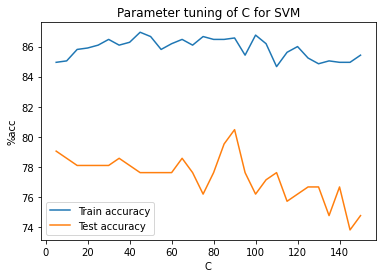

In [38]:
# find the optimal C, the lagrange multiplier of SVM
# cross validation to find the best value of C between 5 and 150
for fold in y_val:    
    for yi in range(len(fold)):
        if fold[yi] == 0:
            fold[yi] = -1
train_acc_list2 = []
test_acc_list2 = []
R = np.arange(5, 155, 5)
for c in R:
    train_acc2 = 0
    test_acc2 = 0
    for ind in range(0, len(x_val)):
        X_test = x_val[ind]
        Y_test = y_val[ind]
        X_train = []
        Y_train = []
        for i in range(len(x_val)):
            if i != ind:
                X_train += x_val[i]
                Y_train += y_val[i] 
        X_test = np.array(X_test)
        Y_test = np.array(Y_test)
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)
        # Add 1 to every row for bias term
        X_train = np.insert(X_train,0,1,axis = 1)
        X_test = np.insert(X_test,0,1,axis = 1)

        W = gradient_descent(maxR, gamma, X_train, Y_train, c, tol)
        trainres = svm_predict(X_train, W)
        train_acc2 += Accuracy(Y_train, trainres)
        testres = svm_predict(X_test, W)
        test_acc2 += Accuracy(Y_test, testres)
    trainacc = train_acc2 / len(x_val)
    testacc = test_acc2 / len(x_val)
    train_acc_list2.append(trainacc)
    test_acc_list2.append(testacc)

plt.figure
plt.plot(R, train_acc_list2)
plt.plot(R, test_acc_list2)
plt.xlabel("C")
plt.ylabel("%acc")
plt.title("Parameter tuning of C for SVM")
plt.legend(['Train accuracy', 'Test accuracy'])

maxtest2 = max(test_acc_list2)
optimal_c = test_acc_list2.index(maxtest2)
print(f"The optimal value of C is: {R[optimal_c]}")

## Testing all the algorithms

In [39]:
def final_results(train_df,test_df):
    
    train_df1 = train_df.copy()
    train_setY1 = train_df1.Target.values.tolist()
    train_setX1 = train_df1.drop('Target', axis=1).values.tolist()
    train_df2 = train_df.copy()
    train_setY2 = np.array(train_df2.Target.values.tolist())
    train_setX2 = np.array(train_df2.drop('Target', axis=1).values.tolist())
    train_df3 = train_df.copy()
    train_setY3 = train_df3.Target.values.tolist()
    train_setX3 = train_df3.drop('Target', axis=1).values.tolist()
    
    test_df1 = test_df.copy()
    test_setY1 = test_df1.Target.tolist()
    test_setX1 = test_df1.drop('Target', axis=1).values.tolist()
    test_df2 = test_df.copy()
    test_setY2 = np.array(test_df2.Target.values.tolist())
    test_setX2 = np.array(test_df2.drop('Target', axis=1).values.tolist())
    test_df3 = test_df.copy()
    test_setY3 = test_df3.Target.values.tolist()
    test_setX3 = test_df3.drop('Target', axis=1).values.tolist()
    
    # test of kNN
    tic()
    kNN_predict = kNN(train_setX1, train_setY1, test_setX1, 7)
    kNN_time = toc()
    kNN_accuracy = Accuracy(test_setY1, kNN_predict)
    print("kNN elapsed time:", kNN_time)
    print("kNN accuracy:", kNN_accuracy)
    
    # test of SVM
    tic()
    svm_train_predict, svm_test_predict = SVM(train_setX2, train_setY2, test_setX2, R[optimal_c], maxR, gamma, tol)
    svm_time = toc()
    for yi in range(len(svm_test_predict)):
        if svm_test_predict[yi] == -1:
            svm_test_predict[yi] = 0
    svm_train_accuracy = Accuracy(train_setY2, svm_train_predict)
    svm_test_accuracy = Accuracy(test_setY2, svm_test_predict)
    print("SVM elapsed time:", svm_time)
    print("SVM train accuracy:", svm_train_accuracy)
    print("SVM test accuracy:", svm_test_accuracy)
    
    # test of SNN
    tic()
    snn_train_predict, snn_test_predict = back_propagation(train_setX3, train_setY3, test_setX3, 0.7, 200, N[optimal_n]-2) #Used heuristics for these numbers
    snn_time = toc()
    for yi in range(len(train_setY3)):
        if train_setY3[yi] == -1:
            train_setY3[yi] = 0
    snn_train_accuracy = Accuracy(train_setY3, snn_train_predict)
    snn_test_accuracy = Accuracy(test_setY3, snn_test_predict)
    print("SNN elapsed time:", snn_time)
    print("SNN train accuracy:", snn_train_accuracy)
    print("SNN test accuracy:", snn_test_accuracy)
    
final_results(train_df,test_df)

kNN elapsed time: 0.1911138000000392
kNN accuracy: 82.41758241758241
SVM elapsed time: 0.2639029000001756
SVM train accuracy: 85.84905660377359
SVM test accuracy: 86.81318681318682
SNN elapsed time: 3.9521254999999655
SNN train accuracy: 81.60377358490565
SNN test accuracy: 85.71428571428571
